#  Lab2: Splines
 
 
### First study the examples in different libraries: Scipy, Statsmodels, sk-learn, pyGAM, csaps, then try to use different different methods do the following questions: 

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

# 1. Regression Splines

The dataset fev.csv contains the measurements of forced expiratory volume (FEV) tests, evaluating the pulmonary capacity in 654 children and young adults.

1. ``Plot`` the association between fev and height and fit a ``linear model`` for fev using height as a predictor

2. Fit a model for fev with a ``natural cubin spline`` for the predictor height, with  df 5 and 10.

3. Fit a model for fev with a ``smoothing cubic spline`` for the predictor height. (Use cross validation to find smoothing parameter lambda) 

4. Fit a model for fev with a ``cubic B-spline`` for the predictor height, with  df 5 and 10.

5. Plot the ``fitted curves`` for above models. 

6. compare the ``cross-validated MSE`` of the above models.


In [7]:
df1 = pd.read_csv('fev.csv')
df1.head(3)

,id,age,fev,height,sex,smoke
0,301,9,1.708,57.0,female,non-current smoker
1,451,8,1.724,67.5,female,non-current smoker
2,501,7,1.720,54.5,female,non-current smoker


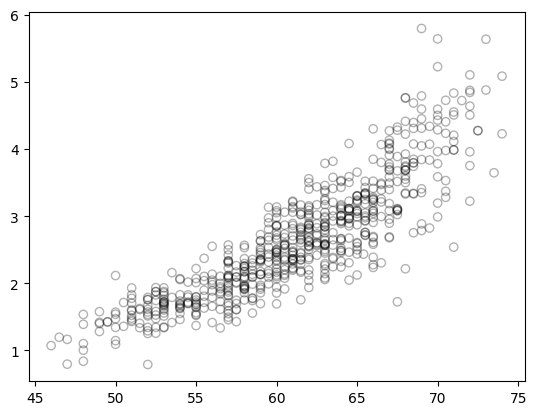

In [8]:
# Visualize the relationship b/w age and wage
plt.scatter(df1.height, df1.fev, facecolor='None', edgecolor='k', alpha=0.3)
plt.show() 

In [9]:
# Generating weights for polynomial function with degree =5
weights = np.polyfit(df1.height, df1.fev, 5)
print(weights) 

[-3.62882037e-07  1.04598980e-04 -1.19414498e-02  6.77612870e-01
 -1.90808036e+01  2.13747676e+02]


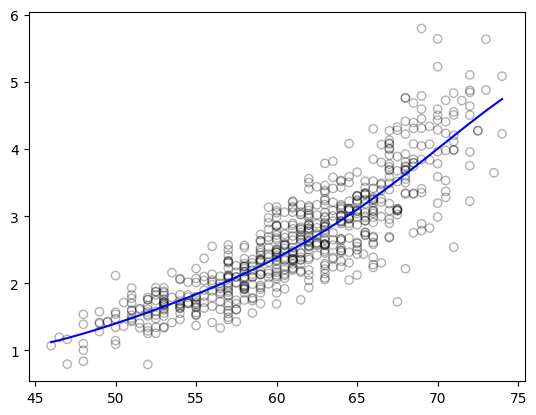

In [10]:
# Generating model with the given weights
model = np.poly1d(weights)

# Prediction on validation set
pred = model(df1.height)
# We will plot the graph for 70 observations only
xp = np.linspace(df1.height.min(),df1.height.max(),70)
pred_plot = model(xp)
plt.scatter(df1.height,df1.fev, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(xp, pred_plot, color='blue')
plt.show()

## Utility functions

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


def load_data():
    """Load the FEV dataset"""
    df = pd.read_csv('fev.csv')
    return df

def plot_model(X, y, X_plot=None, y_pred=None, title='', filename='', curve_label='', curve_color='r', curve_style='-', knots_X=None, knots_y=None, show_data_label=True):
    plt.figure(figsize=(10, 6))

    # Scatter plot of data
    data_label = 'Data' if show_data_label else None
    plt.scatter(X, y, alpha=0.5, edgecolors='k', facecolors='none', label=data_label)

    # Plot fitted curve if provided
    if X_plot is not None and y_pred is not None:
        plt.plot(X_plot, y_pred, color=curve_color, linestyle=curve_style,
                linewidth=2, label=curve_label)

    # Plot knots if provided
    if knots_X is not None and knots_y is not None:
        plt.scatter(knots_X, knots_y, color='red', s=100, zorder=5,
                   label=f'Knots (n={len(knots_X)})')

    plt.xlabel('Height', fontsize=12)
    plt.ylabel('FEV', fontsize=12)
    plt.title(title, fontsize=14)
    if curve_label or show_data_label or (knots_X is not None):
        plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Plot saved as '{filename}'")

    plt.show()

# 1. Plotting the association between fev and height

Dataset shape: (654, 6)
Plot saved as 'fev_height_association.png'


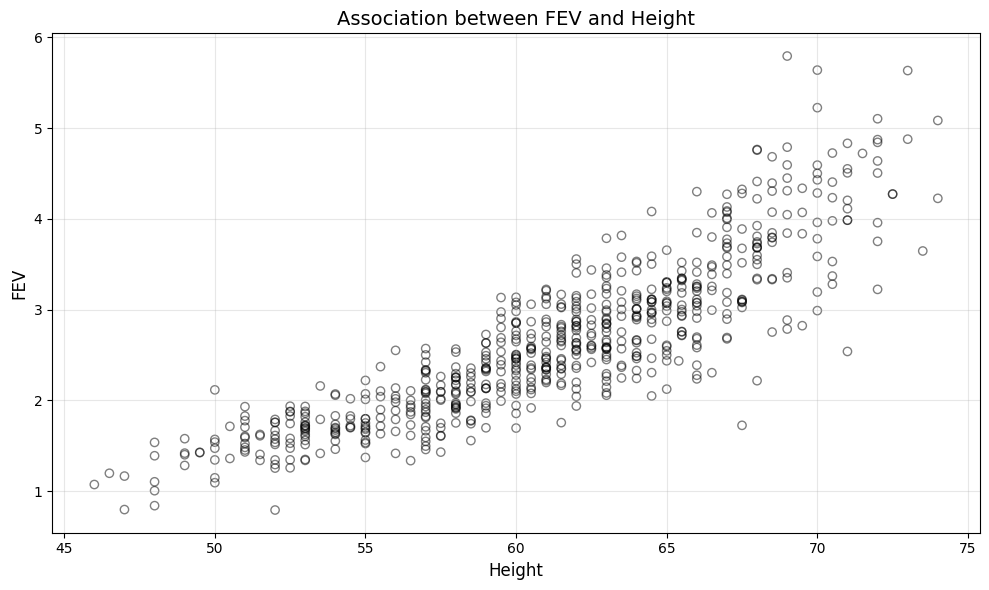

In [12]:
df = load_data()
print(f"Dataset shape: {df.shape}")
    
def plot_association(df):
    X = df['height'].values
    y = df['fev'].values

    plot_model(X, y,
              title='Association between FEV and Height',
              filename='fev_height_association.png',
              show_data_label=False)

plot_association(df)
print()

# Scipy Implementation

1. Fitting a ``linear model`` for fev using height as a predictor

Plot saved as 'fev_linear_model.png'


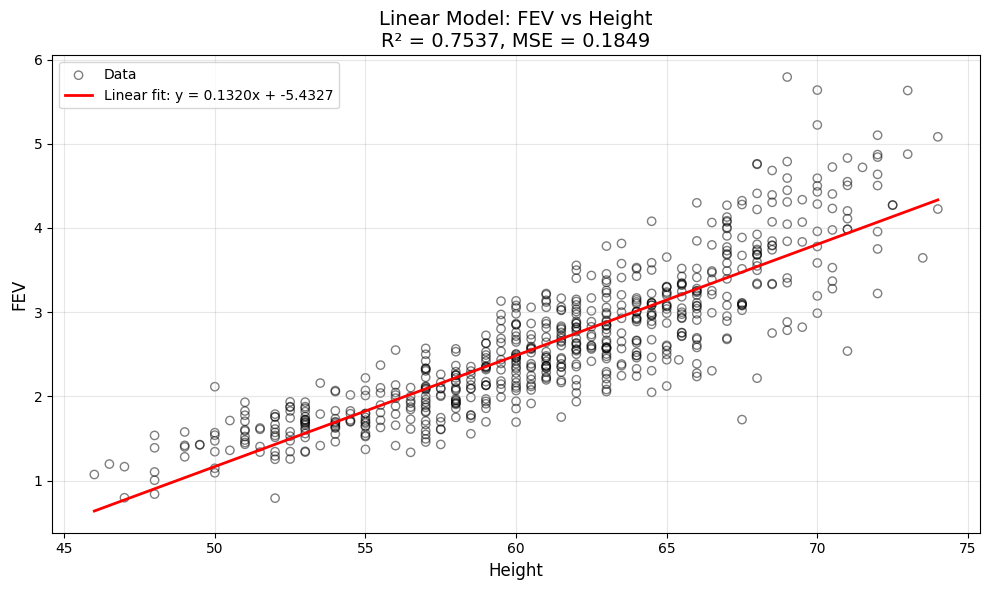


Linear Model Results:
  Equation: FEV = 0.1320 × Height + -5.4327
  R² = 0.7537
  MSE = 0.1849



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.interpolate import CubicSpline, UnivariateSpline, splrep, splev
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

def fit_linear_model(df):
    X = df['height'].values
    y = df['fev'].values

    # Fit linear regression using scipy.stats.linregress
    result = stats.linregress(X, y)
    slope = result.slope
    intercept = result.intercept

    # Predictions
    X_plot = np.linspace(X.min(), X.max(), 100)
    y_pred = slope * X_plot + intercept

    # Calculate MSE and R²
    y_train_pred = slope * X + intercept
    mse = mean_squared_error(y, y_train_pred)
    r2 = r2_score(y, y_train_pred)

    # Plot using common function
    plot_model(X, y, X_plot, y_pred,
              title=f'Linear Model: FEV vs Height\nR² = {r2:.4f}, MSE = {mse:.4f}',
              filename='fev_linear_model.png',
              curve_label=f'Linear fit: y = {slope:.4f}x + {intercept:.4f}',
              curve_color='r')

    print(f"\nLinear Model Results:")
    print(f"  Equation: FEV = {slope:.4f} × Height + {intercept:.4f}")
    print(f"  R² = {r2:.4f}")
    print(f"  MSE = {mse:.4f}")

fit_linear_model(df)
print()

2.  Fit a model for fev with a ``natural cubic spline`` for the predictor height, with  df 5 and 10.

Fitting natural cubic spline with df=5...
Plot saved as 'fev_natural_spline_df5.png'


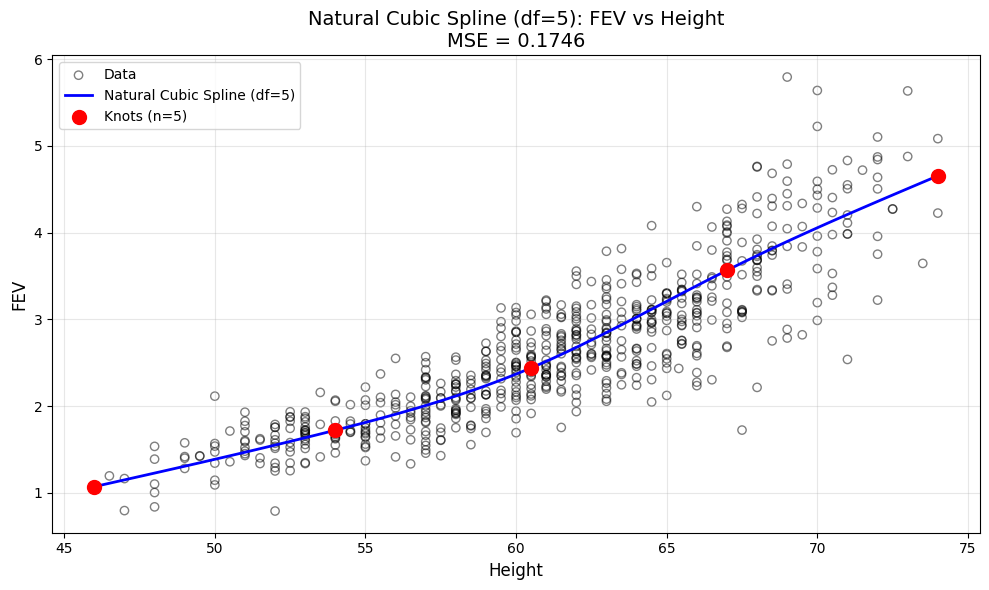


Natural Cubic Spline (df=5) Results:
  Number of knots: 5
  MSE = 0.1746

Fitting natural cubic spline with df=10...
Plot saved as 'fev_natural_spline_df10.png'


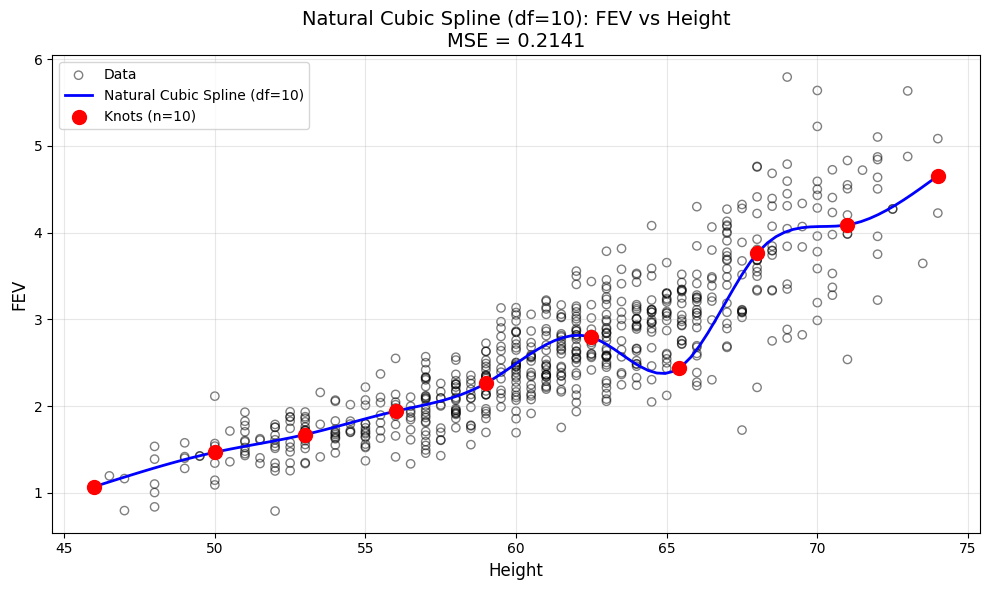


Natural Cubic Spline (df=10) Results:
  Number of knots: 10
  MSE = 0.2141



In [14]:
def fit_natural_cubic_spline(df, df_val):
    X = df['height'].values
    y = df['fev'].values

    # Sort data
    sort_idx = np.argsort(X)
    X_sorted = X[sort_idx]
    y_sorted = y[sort_idx]

    # Remove duplicates by averaging
    unique_x, inverse = np.unique(X_sorted, return_inverse=True)
    unique_y = np.array([y_sorted[inverse == i].mean() for i in range(len(unique_x))])

    # For natural cubic spline: df = number of knots
    # Select knots at quantiles
    n_knots = df_val
    knot_positions = np.linspace(0, 1, n_knots)
    knots = np.quantile(unique_x, knot_positions)

    # Find closest data points to knots
    knot_indices = []
    for knot in knots:
        idx = np.argmin(np.abs(unique_x - knot))
        if idx not in knot_indices:
            knot_indices.append(idx)
    knot_indices = sorted(knot_indices)

    X_knots = unique_x[knot_indices]
    y_knots = unique_y[knot_indices]

    # Fit natural cubic spline using scipy
    spline = CubicSpline(X_knots, y_knots, bc_type='natural')

    # Predictions
    X_plot = np.linspace(X.min(), X.max(), 100)
    y_pred = spline(X_plot)

    # Calculate MSE on original data
    y_train_pred = spline(X_sorted)
    mse = mean_squared_error(y_sorted, y_train_pred)

    # Plot using common function
    plot_model(X, y, X_plot, y_pred,
              title=f'Natural Cubic Spline (df={df_val}): FEV vs Height\nMSE = {mse:.4f}',
              filename=f'fev_natural_spline_df{df_val}.png',
              curve_label=f'Natural Cubic Spline (df={df_val})',
              curve_color='b',
              knots_X=X_knots,
              knots_y=y_knots)

    print(f"\nNatural Cubic Spline (df={df_val}) Results:")
    print(f"  Number of knots: {len(X_knots)}")
    print(f"  MSE = {mse:.4f}")

print("Fitting natural cubic spline with df=5...")
fit_natural_cubic_spline(df, 5)
print()

print("Fitting natural cubic spline with df=10...")
fit_natural_cubic_spline(df, 10)
print()

3.  Fit a model for fev with a ``smoothing cubic spline`` for the predictor height. (Using cross valication to find smoothing parameter lambda) 

  Dataset size (unique): 56
  Using 5-fold cross-validation
  Performing cross-validation to find optimal λ...
    λ =    0.0: CV-MSE = 9.6714
    λ =    0.0: CV-MSE = 2.0306
    λ =    0.2: CV-MSE = 2.1430
    λ =    0.6: CV-MSE = 1.0105
    λ =    2.5: CV-MSE = 0.0635
    λ =   10.0: CV-MSE = 0.0623
    λ =   39.8: CV-MSE = 0.0623
    λ =  158.5: CV-MSE = 0.0623
    λ =  631.0: CV-MSE = 0.0623
    λ = 2511.9: CV-MSE = 0.0623
    λ = 10000.0: CV-MSE = 0.0623

  Best λ = 10.0 (CV-MSE = 0.0623)
Plot saved as 'fev_smoothing_spline.png'


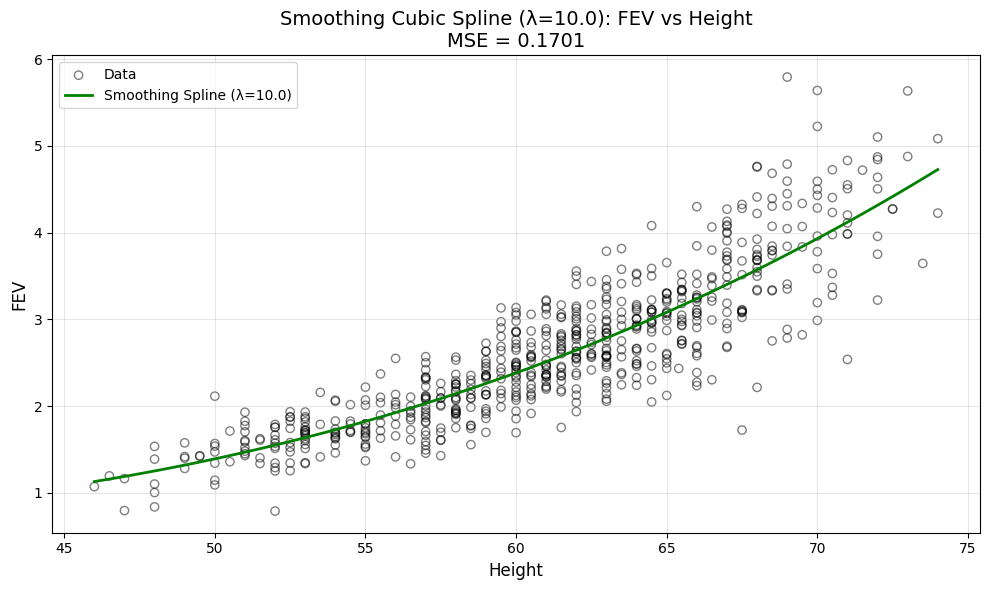


Smoothing Cubic Spline Results:
  Optimal λ = 10.0
  CV-MSE = 0.0623
  Training MSE = 0.1701



In [15]:
def fit_smoothing_spline_cv(df):
    X = df['height'].values
    y = df['fev'].values

    # Sort data and remove duplicates
    sort_idx = np.argsort(X)
    X_sorted = X[sort_idx]
    y_sorted = y[sort_idx]

    # Remove duplicate X values by averaging y values
    unique_x, inverse_indices = np.unique(X_sorted, return_inverse=True)
    unique_y = np.array([y_sorted[inverse_indices == i].mean() for i in range(len(unique_x))])

    # Dynamically determine number of folds based on dataset size
    n = len(unique_x)
    if n < 30:
        k_folds = max(3, n // 5)  # At least 3 folds, ~5 samples per fold
    elif n < 100:
        k_folds = 5
    else:
        k_folds = 10

    print(f"  Dataset size (unique): {n}")
    print(f"  Using {k_folds}-fold cross-validation")

    # Test different smoothing parameters (lambda values)
    smoothing_params = np.logspace(-2, 4, 11)

    print("  Performing cross-validation to find optimal λ...")

    best_lambda = None
    best_cv_mse = np.inf

    # Use sklearn's KFold for cross-validation
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Perform k-fold cross-validation for each smoothing parameter
    for s in smoothing_params:
        fold_mses = []

        for train_idx, test_idx in kf.split(unique_x):
            X_train = unique_x[train_idx]
            X_test = unique_x[test_idx]
            y_train = unique_y[train_idx]
            y_test = unique_y[test_idx]

            if len(X_train) < 4 or len(X_test) < 1:
                continue

            try:
                # Fit smoothing spline on training data
                spline_cv = UnivariateSpline(X_train, y_train, s=s, k=3)
                y_pred = spline_cv(X_test)

                # Check for valid predictions
                if not np.any(np.isnan(y_pred)) and not np.any(np.isinf(y_pred)):
                    fold_mse = mean_squared_error(y_test, y_pred)
                    fold_mses.append(fold_mse)
            except:
                continue

        if len(fold_mses) > 0:
            avg_cv_mse = np.mean(fold_mses)
            print(f"    λ = {s:6.1f}: CV-MSE = {avg_cv_mse:.4f}")

            if avg_cv_mse < best_cv_mse:
                best_cv_mse = avg_cv_mse
                best_lambda = s

    if best_lambda is None:
        best_lambda = 5.0
        print(f"  Using default λ = {best_lambda}")
    else:
        print(f"\n  Best λ = {best_lambda:.1f} (CV-MSE = {best_cv_mse:.4f})")

    # Fit final model with best smoothing parameter on all data
    spline = UnivariateSpline(unique_x, unique_y, s=best_lambda, k=3)

    # Predictions
    X_plot = np.linspace(X.min(), X.max(), 100)
    y_pred = spline(X_plot)

    # Calculate training MSE on original data
    y_train_pred = spline(X_sorted)
    train_mse = mean_squared_error(y_sorted, y_train_pred)

    # Plot using common function
    plot_model(X, y, X_plot, y_pred,
              title=f'Smoothing Cubic Spline (λ={best_lambda:.1f}): FEV vs Height\nMSE = {train_mse:.4f}',
              filename='fev_smoothing_spline.png',
              curve_label=f'Smoothing Spline (λ={best_lambda:.1f})',
              curve_color='g')

    print(f"\nSmoothing Cubic Spline Results:")
    print(f"  Optimal λ = {best_lambda:.1f}")
    print(f"  CV-MSE = {best_cv_mse:.4f}")
    print(f"  Training MSE = {train_mse:.4f}")

fit_smoothing_spline_cv(df)
print()

4.   Fit a model for fev with a ``cubic B-spline`` for the predictor height, with  df 5 and 10. 

Fitting cubic B-spline with df=5...
Plot saved as 'fev_bspline_df5.png'


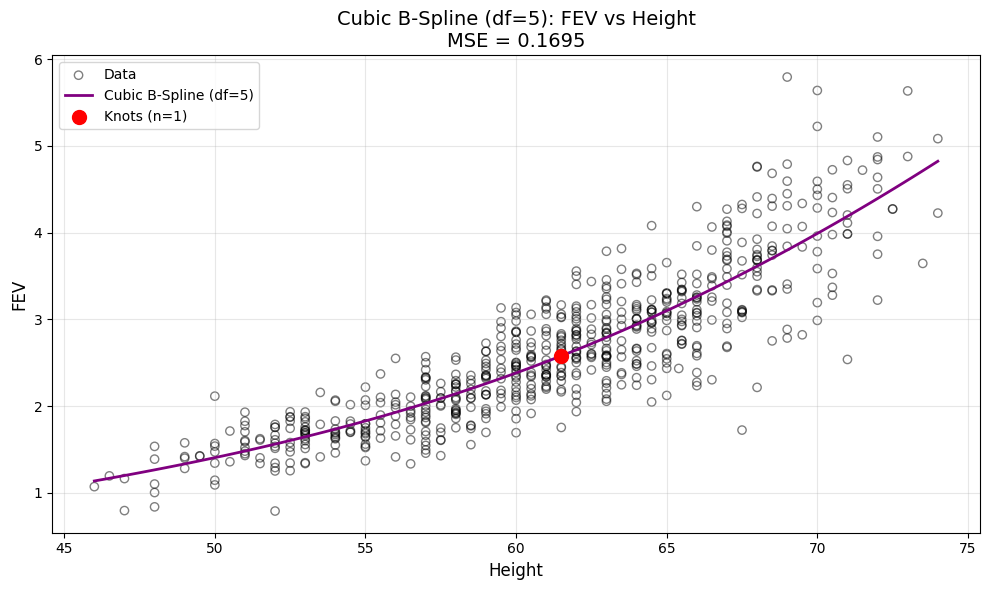


Cubic B-Spline (df=5) Results:
  Degree: 3
  Number of interior knots: 1
  MSE = 0.1695

Fitting cubic B-spline with df=10...
Plot saved as 'fev_bspline_df10.png'


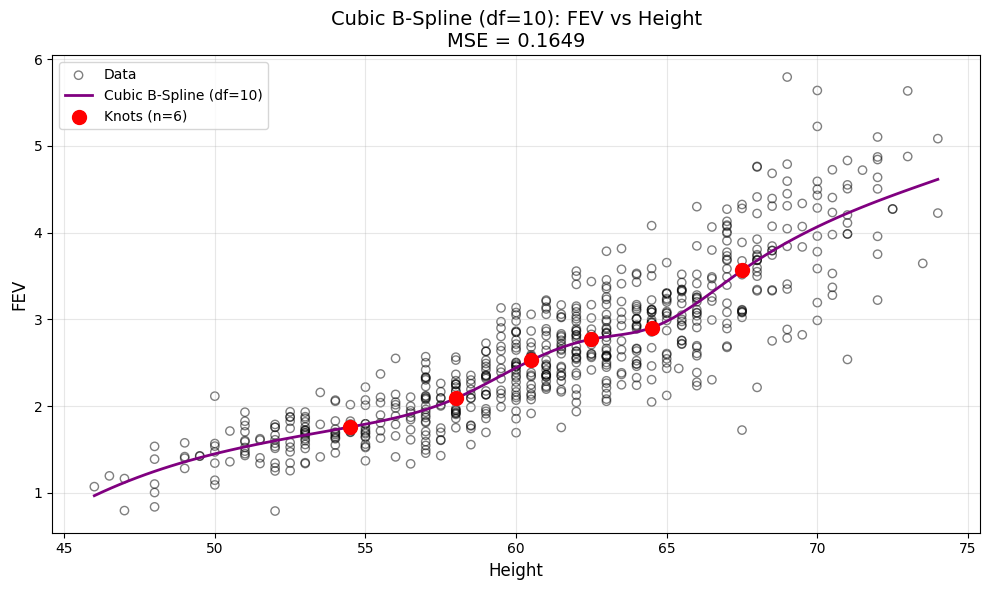


Cubic B-Spline (df=10) Results:
  Degree: 3
  Number of interior knots: 6
  MSE = 0.1649



In [16]:
def fit_bspline(df, df_val):
    X = df['height'].values
    y = df['fev'].values

    # Sort data
    sort_idx = np.argsort(X)
    X_sorted = X[sort_idx]
    y_sorted = y[sort_idx]

    # Calculate number of interior knots
    degree = 3  # Cubic spline
    n_interior_knots = df_val - degree - 1

    if n_interior_knots < 0:
        n_interior_knots = 0

    # Create interior knots at quantiles
    if n_interior_knots > 0:
        knot_positions = np.linspace(0, 1, n_interior_knots + 2)[1:-1]
        interior_knots = np.quantile(X_sorted, knot_positions)
    else:
        interior_knots = np.array([])

    # Fit B-spline using scipy.interpolate.splrep
    tck = splrep(X_sorted, y_sorted, t=interior_knots, k=degree)

    # Predictions
    X_plot = np.linspace(X.min(), X.max(), 100)
    y_pred = splev(X_plot, tck)

    # Calculate MSE
    y_train_pred = splev(X_sorted, tck)
    mse = mean_squared_error(y_sorted, y_train_pred)

    # Prepare knot positions for plotting
    knots_X_plot = None
    knots_y_plot = None
    if len(interior_knots) > 0:
        knots_X_plot = interior_knots
        knots_y_plot = splev(interior_knots, tck)

    # Plot using common function
    plot_model(X, y, X_plot, y_pred,
              title=f'Cubic B-Spline (df={df_val}): FEV vs Height\nMSE = {mse:.4f}',
              filename=f'fev_bspline_df{df_val}.png',
              curve_label=f'Cubic B-Spline (df={df_val})',
              curve_color='purple',
              knots_X=knots_X_plot,
              knots_y=knots_y_plot)

    print(f"\nCubic B-Spline (df={df_val}) Results:")
    print(f"  Degree: {degree}")
    print(f"  Number of interior knots: {len(interior_knots)}")
    print(f"  MSE = {mse:.4f}")

print("Fitting cubic B-spline with df=5...")
fit_bspline(df, 5)
print()

print("Fitting cubic B-spline with df=10...")
fit_bspline(df, 10)
print()

5. Comparison  of ``cross-validated MSE`` of the above models.

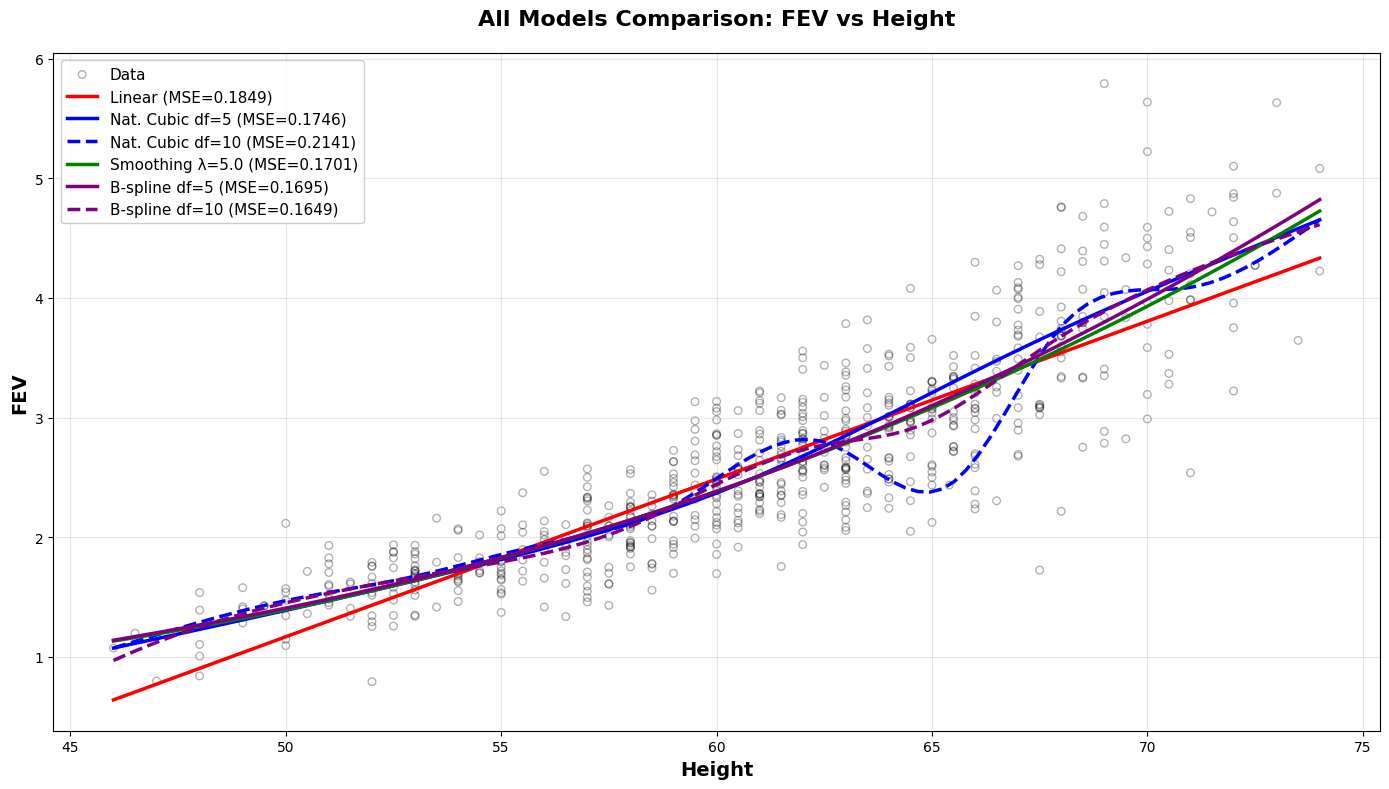

In [17]:
def plot_all_combined(df):
    X = df['height'].values
    y = df['fev'].values

    # Sort data for splines
    sort_idx = np.argsort(X)
    X_sorted = X[sort_idx]
    y_sorted = y[sort_idx]
    unique_x, inverse = np.unique(X_sorted, return_inverse=True)
    unique_y = np.array([y_sorted[inverse == i].mean() for i in range(len(unique_x))])

    # Create single figure for overlay comparison
    fig, ax = plt.subplots(figsize=(14, 8))

    X_plot = np.linspace(X.min(), X.max(), 100)

    # Plot data
    ax.scatter(X, y, alpha=0.3, edgecolors='k', facecolors='none', s=30, label='Data', zorder=1)

    # 1. Linear model
    result = stats.linregress(X, y)
    y_linear = result.slope * X_plot + result.intercept
    mse_linear = mean_squared_error(y, result.slope * X + result.intercept)
    ax.plot(X_plot, y_linear, 'r-', linewidth=2.5, label=f'Linear (MSE={mse_linear:.4f})', zorder=2)

    # 2. Natural cubic spline df=5
    knots = np.quantile(unique_x, np.linspace(0, 1, 5))
    knot_indices = sorted(set([np.argmin(np.abs(unique_x - k)) for k in knots]))
    spline_nat5 = CubicSpline(unique_x[knot_indices], unique_y[knot_indices], bc_type='natural')
    mse_nat5 = mean_squared_error(y_sorted, spline_nat5(X_sorted))
    ax.plot(X_plot, spline_nat5(X_plot), 'b-', linewidth=2.5, label=f'Nat. Cubic df=5 (MSE={mse_nat5:.4f})', zorder=3)

    # 3. Natural cubic spline df=10
    knots = np.quantile(unique_x, np.linspace(0, 1, 10))
    knot_indices = sorted(set([np.argmin(np.abs(unique_x - k)) for k in knots]))
    spline_nat10 = CubicSpline(unique_x[knot_indices], unique_y[knot_indices], bc_type='natural')
    mse_nat10 = mean_squared_error(y_sorted, spline_nat10(X_sorted))
    ax.plot(X_plot, spline_nat10(X_plot), 'b--', linewidth=2.5, label=f'Nat. Cubic df=10 (MSE={mse_nat10:.4f})', zorder=4)

    # 4. Smoothing spline
    spline_smooth = UnivariateSpline(unique_x, unique_y, s=5.0, k=3)
    mse_smooth = mean_squared_error(y_sorted, spline_smooth(X_sorted))
    ax.plot(X_plot, spline_smooth(X_plot), 'g-', linewidth=2.5, label=f'Smoothing λ=5.0 (MSE={mse_smooth:.4f})', zorder=5)

    # 5. B-spline df=5
    interior_knots = np.array([np.quantile(X_sorted, 0.5)])
    tck_bs5 = splrep(X_sorted, y_sorted, t=interior_knots, k=3)
    mse_bs5 = mean_squared_error(y_sorted, splev(X_sorted, tck_bs5))
    ax.plot(X_plot, splev(X_plot, tck_bs5), color='purple', linewidth=2.5, label=f'B-spline df=5 (MSE={mse_bs5:.4f})', zorder=6)

    # 6. B-spline df=10
    interior_knots = np.quantile(X_sorted, np.linspace(0, 1, 8)[1:-1])
    tck_bs10 = splrep(X_sorted, y_sorted, t=interior_knots, k=3)
    mse_bs10 = mean_squared_error(y_sorted, splev(X_sorted, tck_bs10))
    ax.plot(X_plot, splev(X_plot, tck_bs10), color='purple', linestyle='--', linewidth=2.5, label=f'B-spline df=10 (MSE={mse_bs10:.4f})', zorder=7)

    ax.set_xlabel('Height', fontsize=14, fontweight='bold')
    ax.set_ylabel('FEV', fontsize=14, fontweight='bold')
    ax.set_title('All Models Comparison: FEV vs Height', fontsize=16, fontweight='bold', pad=20)
    ax.legend(fontsize=11, loc='upper left', framealpha=0.95)
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('fev_all_models_combined.png', dpi=300, bbox_inches='tight')
    plt.show()
    
plot_all_combined(df)

# Statsmodels Implementation

1. Fitting a ``linear model`` for fev using height as a predictor

Plot saved as 'fev_linear_model_sm.png'


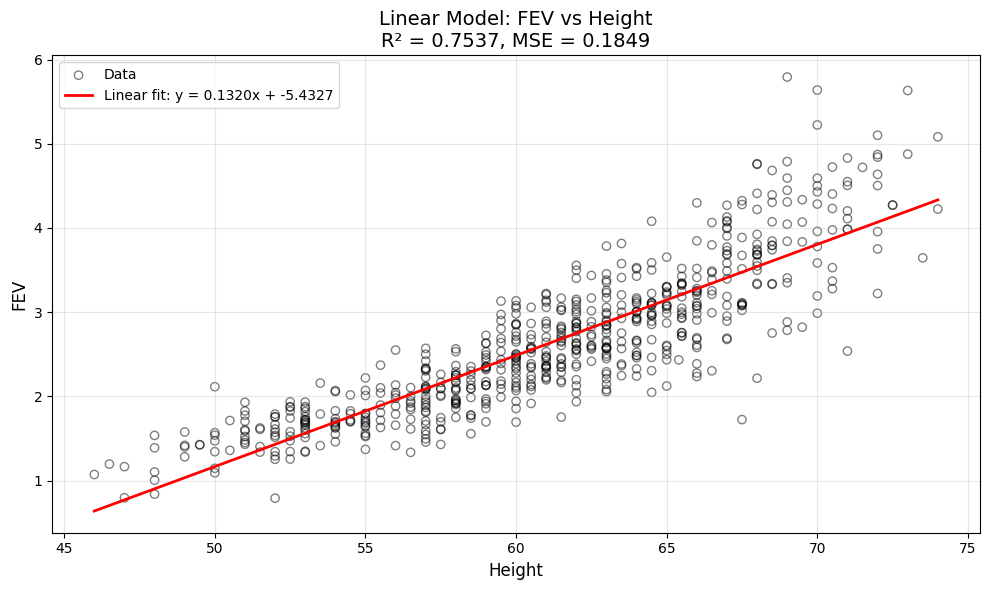


Linear Model Results (using statsmodels.formula.api.ols):
  Equation: FEV = 0.1320 × Height + -5.4327
  R² = 0.7537
  MSE = 0.1849



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.gam.api import GLMGam, BSplines
from scipy.interpolate import UnivariateSpline
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

def fit_linear_model(df):
    """Fit and plot linear model for fev using height as predictor using statsmodels"""
    X = df['height'].values
    y = df['fev'].values

    # Fit linear regression using statsmodels formula API
    result = smf.ols('fev ~ height', data=df).fit()

    intercept = result.params['Intercept']
    slope = result.params['height']

    # Predictions
    X_plot = np.linspace(X.min(), X.max(), 100)
    df_plot = pd.DataFrame({'height': X_plot})
    y_pred = result.predict(df_plot)

    # Calculate MSE and R²
    y_train_pred = result.predict(df)
    mse = mean_squared_error(y, y_train_pred)
    r2 = r2_score(y, y_train_pred)

    # Plot using common function
    plot_model(X, y, X_plot, y_pred,
              title=f'Linear Model: FEV vs Height\nR² = {r2:.4f}, MSE = {mse:.4f}',
              filename='fev_linear_model_sm.png',
              curve_label=f'Linear fit: y = {slope:.4f}x + {intercept:.4f}',
              curve_color='r')

    print(f"\nLinear Model Results (using statsmodels.formula.api.ols):")
    print(f"  Equation: FEV = {slope:.4f} × Height + {intercept:.4f}")
    print(f"  R² = {r2:.4f}")
    print(f"  MSE = {mse:.4f}")

fit_linear_model(df)
print()

2. Fitting a model for fev with a ``natural cubic spline`` for the predictor height, with  df 5 and 10.

Fitting natural cubic spline with df=5...
Plot saved as 'fev_natural_spline_df5_sm.png'


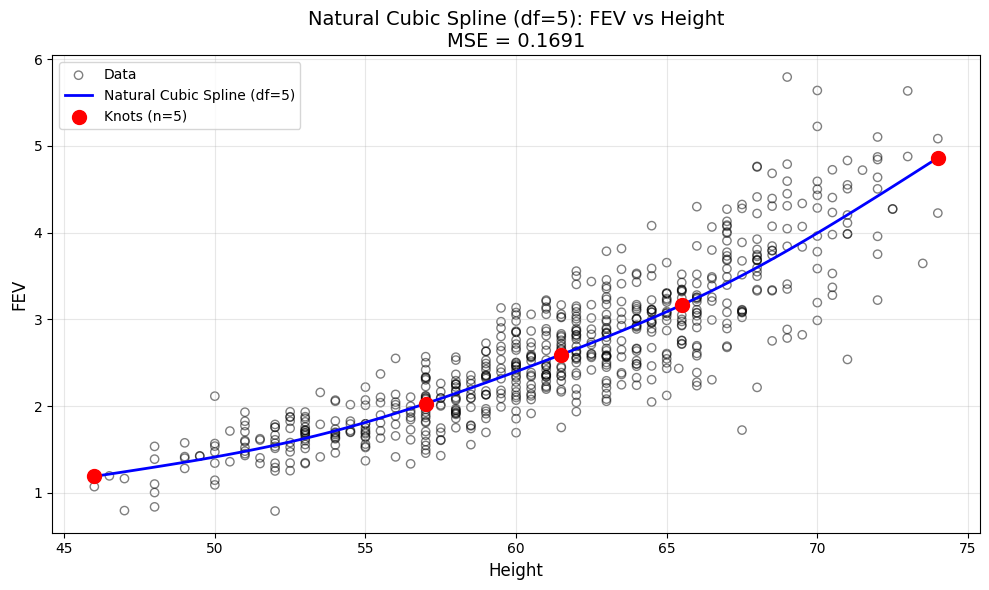


Natural Cubic Spline (df=5) Results:
  Number of basis functions: 5
  R² = 0.7747
  MSE = 0.1691

Fitting natural cubic spline with df=10...
Plot saved as 'fev_natural_spline_df10_sm.png'


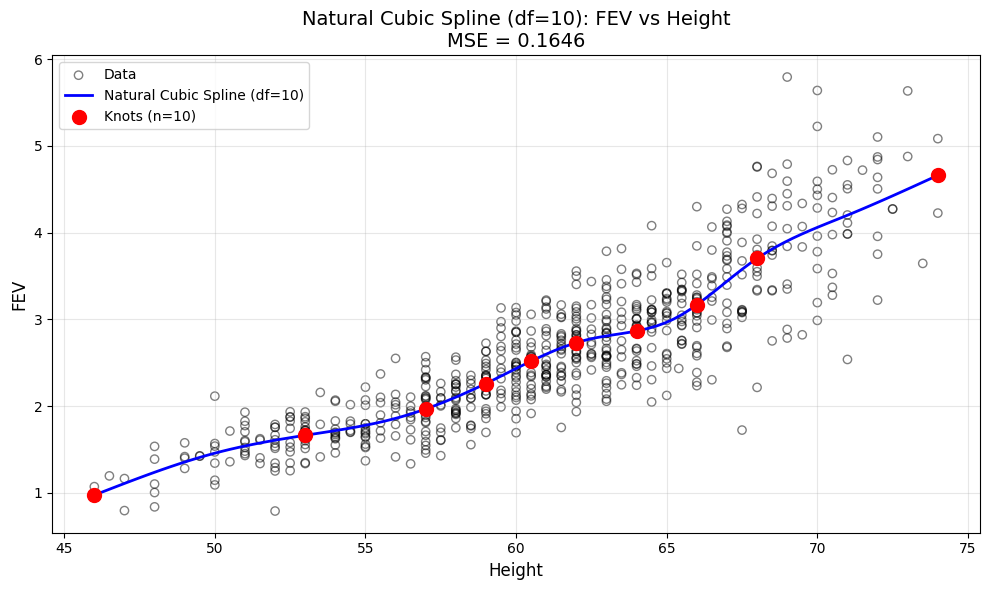


Natural Cubic Spline (df=10) Results:
  Number of basis functions: 10
  R² = 0.7807
  MSE = 0.1646



In [19]:
def fit_natural_cubic_spline(df, df_val):
    X = df['height'].values
    y = df['fev'].values

    # Fit natural cubic spline using formula API
    # cr() creates natural cubic regression splines
    formula = f'fev ~ cr(height, df={df_val})'
    result = smf.ols(formula, data=df).fit()

    # Predictions for plotting
    X_plot = np.linspace(X.min(), X.max(), 100)
    df_plot = pd.DataFrame({'height': X_plot})
    y_pred = result.predict(df_plot)

    # Calculate MSE and R²
    y_train_pred = result.predict(df)
    mse = mean_squared_error(y, y_train_pred)
    r2 = r2_score(y, y_train_pred)

    # Get knot positions (approximate from quantiles)
    knot_positions = np.linspace(0, 1, df_val)
    X_knots = np.quantile(X, knot_positions)
    df_knots = pd.DataFrame({'height': X_knots})
    y_knots = result.predict(df_knots)

    # Plot using common function
    plot_model(X, y, X_plot, y_pred,
              title=f'Natural Cubic Spline (df={df_val}): FEV vs Height\nMSE = {mse:.4f}',
              filename=f'fev_natural_spline_df{df_val}_sm.png',
              curve_label=f'Natural Cubic Spline (df={df_val})',
              curve_color='b',
              knots_X=X_knots,
              knots_y=y_knots)

    print(f"\nNatural Cubic Spline (df={df_val}) Results:")
    print(f"  Number of basis functions: {df_val}")
    print(f"  R² = {r2:.4f}")
    print(f"  MSE = {mse:.4f}")

#  Natural cubic spline with df=5
print("Fitting natural cubic spline with df=5...")
fit_natural_cubic_spline(df, 5)
print()

# Natural cubic spline with df=10
print("Fitting natural cubic spline with df=10...")
fit_natural_cubic_spline(df, 10)
print()

3. Fitting a model for fev with a ``smoothing cubic spline`` for the predictor height. (Using cross valication to find smoothing parameter lambda) 

  Dataset size: 56
  Using 5-fold cross-validation
  Performing cross-validation to find optimal smoothing parameter s...
    s =      0.0: CV-MSE = 9.6714
    s =      0.0: CV-MSE = 2.0306
    s =      0.2: CV-MSE = 2.1430
    s =      0.6: CV-MSE = 1.0105
    s =      2.5: CV-MSE = 0.0635
    s =     10.0: CV-MSE = 0.0623
    s =     39.8: CV-MSE = 0.0623
    s =    158.5: CV-MSE = 0.0623
    s =    631.0: CV-MSE = 0.0623
    s =   2511.9: CV-MSE = 0.0623
    s =  10000.0: CV-MSE = 0.0623

  Best s = 10.0 (CV-MSE = 0.0623)
Plot saved as 'fev_smoothing_spline_sm.png'


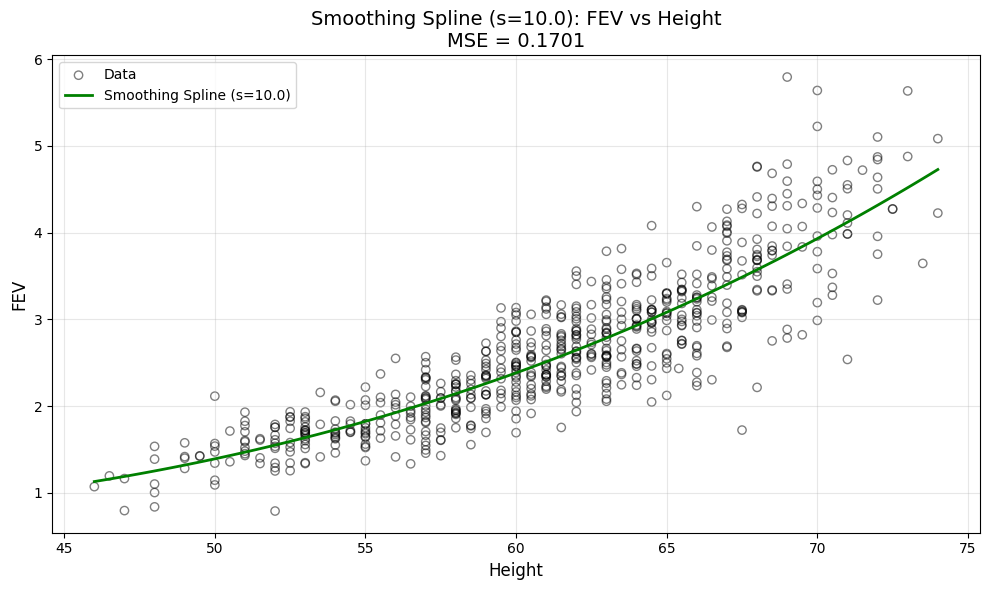


Smoothing Spline Results:
  Optimal s = 10.0
  CV-MSE = 0.0623
  Training MSE = 0.1701
  R² = 0.7734



In [20]:
def fit_smoothing_spline_cv(df):
    X = df['height'].values
    y = df['fev'].values

    # Sort data
    sort_idx = np.argsort(X)
    X_sorted = X[sort_idx]
    y_sorted = y[sort_idx]

    # Handle duplicate x values by averaging y values
    unique_x, inverse_indices = np.unique(X_sorted, return_inverse=True)
    unique_y = np.array([y_sorted[inverse_indices == i].mean() for i in range(len(unique_x))])

    # Dynamically determine number of folds
    n = len(unique_x)
    if n < 30:
        k_folds = max(3, n // 5)
    elif n < 100:
        k_folds = 5
    else:
        k_folds = 10

    print(f"  Dataset size: {n}")
    print(f"  Using {k_folds}-fold cross-validation")

    # Test different smoothing parameters (s)
    # In scipy's UnivariateSpline, s is the smoothing parameter
    # Larger s = more smoothing
    s_params = np.logspace(-2, 4, 11)

    print("  Performing cross-validation to find optimal smoothing parameter s...")

    best_s = None
    best_cv_mse = np.inf

    # Use sklearn's KFold for cross-validation
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    for s_val in s_params:
        fold_mses = []

        for train_idx, test_idx in kf.split(unique_x):
            X_train = unique_x[train_idx]
            X_test = unique_x[test_idx]
            y_train = unique_y[train_idx]
            y_test = unique_y[test_idx]

            if len(X_train) < 4 or len(X_test) < 1:
                continue

            try:
                # Fit smoothing spline on training data
                spline = UnivariateSpline(X_train, y_train, s=s_val)

                # Predict on test data
                y_pred = spline(X_test)

                # Check for valid predictions
                if not np.any(np.isnan(y_pred)) and not np.any(np.isinf(y_pred)):
                    fold_mse = mean_squared_error(y_test, y_pred)
                    fold_mses.append(fold_mse)
            except:
                continue

        if len(fold_mses) > 0:
            avg_cv_mse = np.mean(fold_mses)
            print(f"    s = {s_val:8.1f}: CV-MSE = {avg_cv_mse:.4f}")

            if avg_cv_mse < best_cv_mse:
                best_cv_mse = avg_cv_mse
                best_s = s_val

    if best_s is None:
        best_s = 100.0
        print(f"  Using default s = {best_s}")
    else:
        print(f"\n  Best s = {best_s:.1f} (CV-MSE = {best_cv_mse:.4f})")

    # Fit final model with best smoothing parameter on all unique data
    spline_final = UnivariateSpline(unique_x, unique_y, s=best_s)

    # Predictions
    X_plot = np.linspace(X.min(), X.max(), 100)
    y_pred = spline_final(X_plot)

    # Calculate training MSE and R² on original data
    y_train_pred = spline_final(X)
    train_mse = mean_squared_error(y, y_train_pred)
    r2 = r2_score(y, y_train_pred)

    # Plot using common function
    plot_model(X, y, X_plot, y_pred,
              title=f'Smoothing Spline (s={best_s:.1f}): FEV vs Height\nMSE = {train_mse:.4f}',
              filename='fev_smoothing_spline_sm.png',
              curve_label=f'Smoothing Spline (s={best_s:.1f})',
              curve_color='g')

    print(f"\nSmoothing Spline Results:")
    print(f"  Optimal s = {best_s:.1f}")
    print(f"  CV-MSE = {best_cv_mse:.4f}")
    print(f"  Training MSE = {train_mse:.4f}")
    print(f"  R² = {r2:.4f}")

fit_smoothing_spline_cv(df)
print()

4. Fitting a model for fev with a ``cubic B-spline`` for the predictor height, with  df 5 and 10.

Fitting cubic B-spline with df=5...
Plot saved as 'fev_bspline_df5_sm.png'


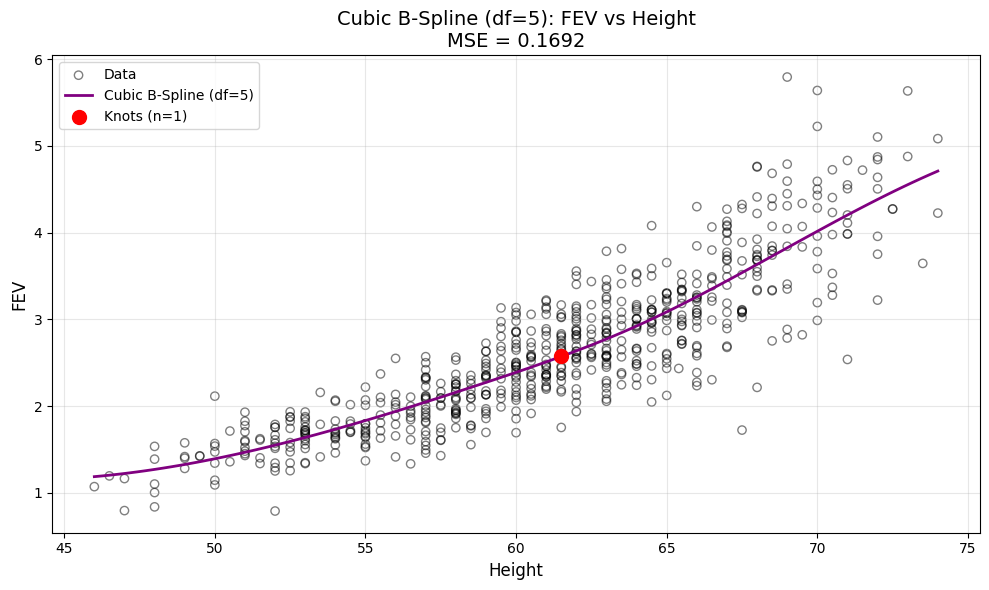


Cubic B-Spline (df=5) Results:
  Degree: 3
  Number of basis functions: 5
  Number of interior knots: 1
  R² = 0.7745
  MSE = 0.1692

Fitting cubic B-spline with df=10...
Plot saved as 'fev_bspline_df10_sm.png'


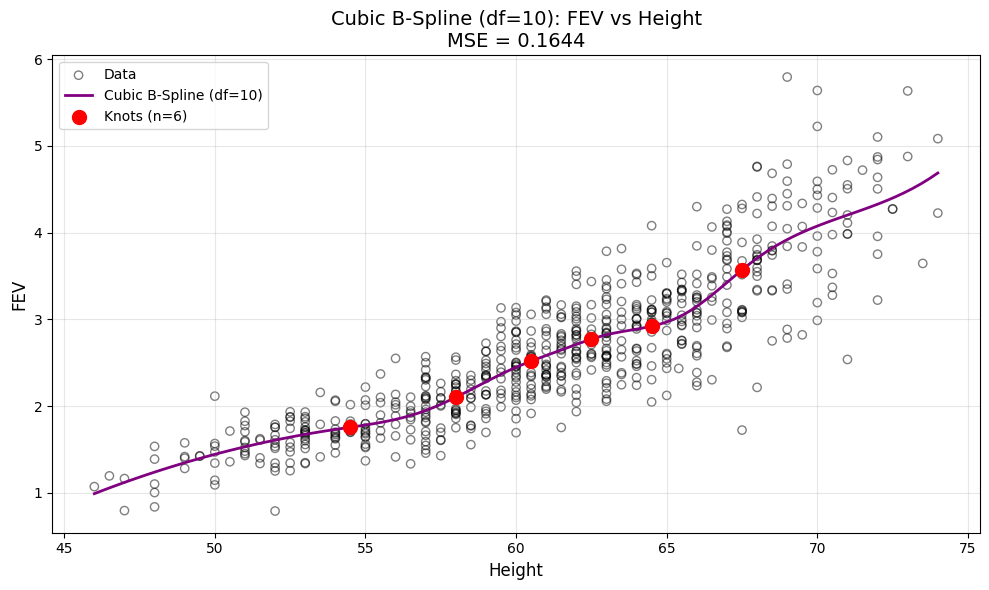


Cubic B-Spline (df=10) Results:
  Degree: 3
  Number of basis functions: 10
  Number of interior knots: 6
  R² = 0.7809
  MSE = 0.1644



In [21]:
def fit_bspline(df, df_val):
    X = df['height'].values
    y = df['fev'].values

    # Fit B-spline using formula API
    # bs() creates B-spline basis functions
    formula = f'fev ~ bs(height, df={df_val}, degree=3)'
    result = smf.ols(formula, data=df).fit()

    # Predictions for plotting
    X_plot = np.linspace(X.min(), X.max(), 100)
    df_plot = pd.DataFrame({'height': X_plot})
    y_pred = result.predict(df_plot)

    # Calculate MSE and R²
    y_train_pred = result.predict(df)
    mse = mean_squared_error(y, y_train_pred)
    r2 = r2_score(y, y_train_pred)

    # Get knot positions (interior knots)
    # For B-splines: n_interior_knots = df - degree - 1
    degree = 3
    n_interior_knots = df_val - degree - 1

    knots_X_plot = None
    knots_y_plot = None
    if n_interior_knots > 0:
        knot_positions = np.linspace(0, 1, n_interior_knots + 2)[1:-1]
        knots_X_plot = np.quantile(X, knot_positions)
        df_knots = pd.DataFrame({'height': knots_X_plot})
        knots_y_plot = result.predict(df_knots)

    # Plot using common function
    plot_model(X, y, X_plot, y_pred,
              title=f'Cubic B-Spline (df={df_val}): FEV vs Height\nMSE = {mse:.4f}',
              filename=f'fev_bspline_df{df_val}_sm.png',
              curve_label=f'Cubic B-Spline (df={df_val})',
              curve_color='purple',
              knots_X=knots_X_plot,
              knots_y=knots_y_plot)

    print(f"\nCubic B-Spline (df={df_val}) Results:")
    print(f"  Degree: {degree}")
    print(f"  Number of basis functions: {df_val}")
    print(f"  Number of interior knots: {n_interior_knots}")
    print(f"  R² = {r2:.4f}")
    print(f"  MSE = {mse:.4f}")

 # Cubic B-spline with df=5
print("Fitting cubic B-spline with df=5...")
fit_bspline(df, 5)
print()

# Cubic B-spline with df=10
print("Fitting cubic B-spline with df=10...")
fit_bspline(df, 10)
print()

5. Comparison  of ``cross-validated MSE`` of the above models.

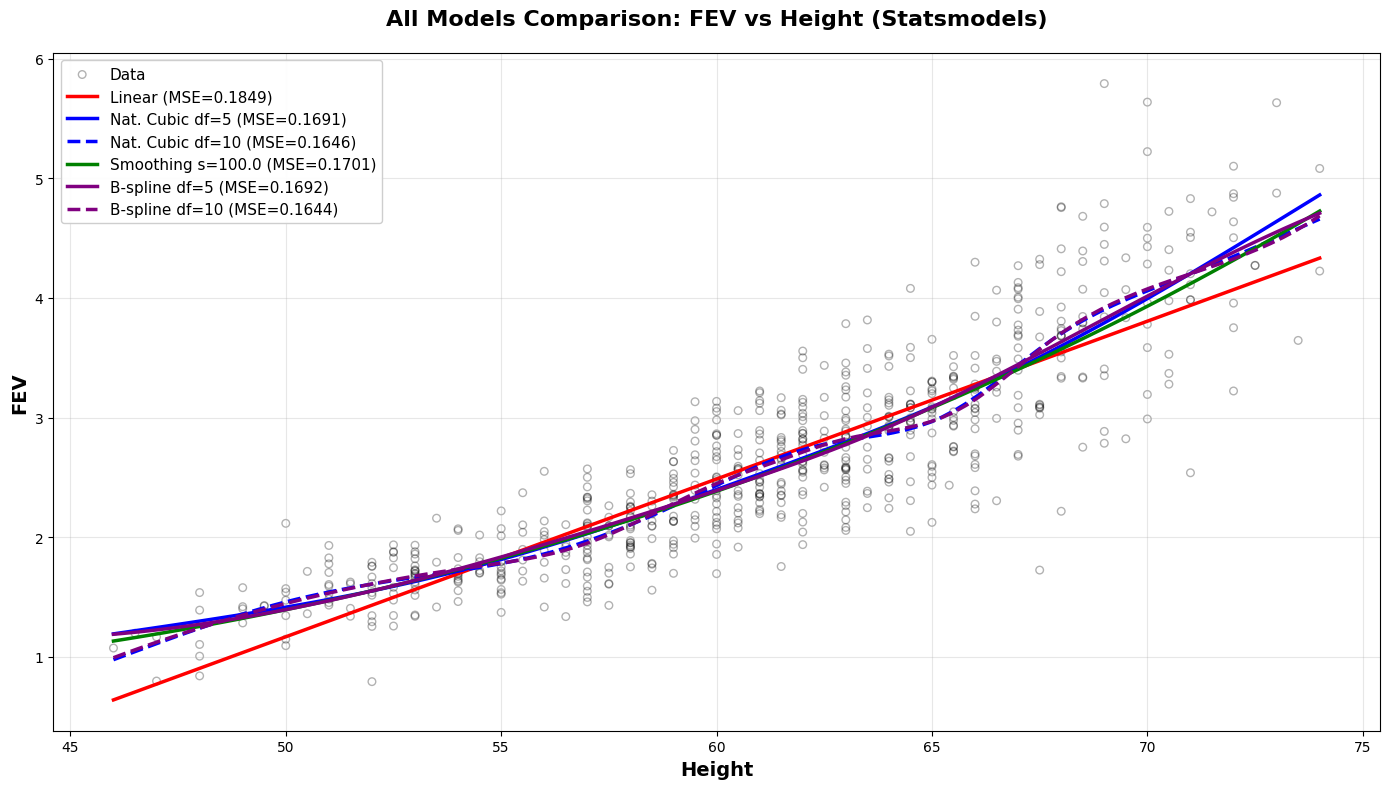

In [22]:
def plot_all_combined(df):
    X = df['height'].values
    y = df['fev'].values

    # Create single figure for overlay comparison
    fig, ax = plt.subplots(figsize=(14, 8))

    X_plot = np.linspace(X.min(), X.max(), 100)
    df_plot = pd.DataFrame({'height': X_plot})

    # Plot data
    ax.scatter(X, y, alpha=0.3, edgecolors='k', facecolors='none', s=30, label='Data', zorder=1)

    # 1. Linear model using formula API
    model_linear = smf.ols('fev ~ height', data=df).fit()
    y_linear = model_linear.predict(df_plot)
    mse_linear = mean_squared_error(y, model_linear.predict(df))
    ax.plot(X_plot, y_linear, 'r-', linewidth=2.5, label=f'Linear (MSE={mse_linear:.4f})', zorder=2)

    # 2. Natural cubic spline df=5
    model_nat5 = smf.ols('fev ~ cr(height, df=5)', data=df).fit()
    y_nat5 = model_nat5.predict(df_plot)
    mse_nat5 = mean_squared_error(y, model_nat5.predict(df))
    ax.plot(X_plot, y_nat5, 'b-', linewidth=2.5, label=f'Nat. Cubic df=5 (MSE={mse_nat5:.4f})', zorder=3)

    # 3. Natural cubic spline df=10
    model_nat10 = smf.ols('fev ~ cr(height, df=10)', data=df).fit()
    y_nat10 = model_nat10.predict(df_plot)
    mse_nat10 = mean_squared_error(y, model_nat10.predict(df))
    ax.plot(X_plot, y_nat10, 'b--', linewidth=2.5, label=f'Nat. Cubic df=10 (MSE={mse_nat10:.4f})', zorder=4)

    # 4. Smoothing spline using UnivariateSpline
    # Handle duplicate x values by using unique sorted values
    sort_idx = np.argsort(X)
    X_sorted = X[sort_idx]
    y_sorted = y[sort_idx]
    
    # Get unique x values and average y values for duplicates
    unique_x, inverse_indices = np.unique(X_sorted, return_inverse=True)
    unique_y = np.array([y_sorted[inverse_indices == i].mean() for i in range(len(unique_x))])
    
    spline_smooth = UnivariateSpline(unique_x, unique_y, s=100.0)
    y_smooth = spline_smooth(X_plot)
    y_train_pred = spline_smooth(X)
    mse_smooth = mean_squared_error(y, y_train_pred)
    ax.plot(X_plot, y_smooth, 'g-', linewidth=2.5, label=f'Smoothing s=100.0 (MSE={mse_smooth:.4f})', zorder=5)

    # 5. B-spline df=5
    model_bs5 = smf.ols('fev ~ bs(height, df=5, degree=3)', data=df).fit()
    y_bs5 = model_bs5.predict(df_plot)
    mse_bs5 = mean_squared_error(y, model_bs5.predict(df))
    ax.plot(X_plot, y_bs5, color='purple', linewidth=2.5, label=f'B-spline df=5 (MSE={mse_bs5:.4f})', zorder=6)

    # 6. B-spline df=10
    model_bs10 = smf.ols('fev ~ bs(height, df=10, degree=3)', data=df).fit()
    y_bs10 = model_bs10.predict(df_plot)
    mse_bs10 = mean_squared_error(y, model_bs10.predict(df))
    ax.plot(X_plot, y_bs10, color='purple', linestyle='--', linewidth=2.5, label=f'B-spline df=10 (MSE={mse_bs10:.4f})', zorder=7)

    ax.set_xlabel('Height', fontsize=14, fontweight='bold')
    ax.set_ylabel('FEV', fontsize=14, fontweight='bold')
    ax.set_title('All Models Comparison: FEV vs Height (Statsmodels)', fontsize=16, fontweight='bold', pad=20)
    ax.legend(fontsize=11, loc='upper left', framealpha=0.95)
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('fev_all_models_combined_sm.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_all_combined(df)

# pyGAM Implementation

1. Fitting a ``linear model`` for fev using height as a predictor

Plot saved as 'fev_linear_model_pygam.png'


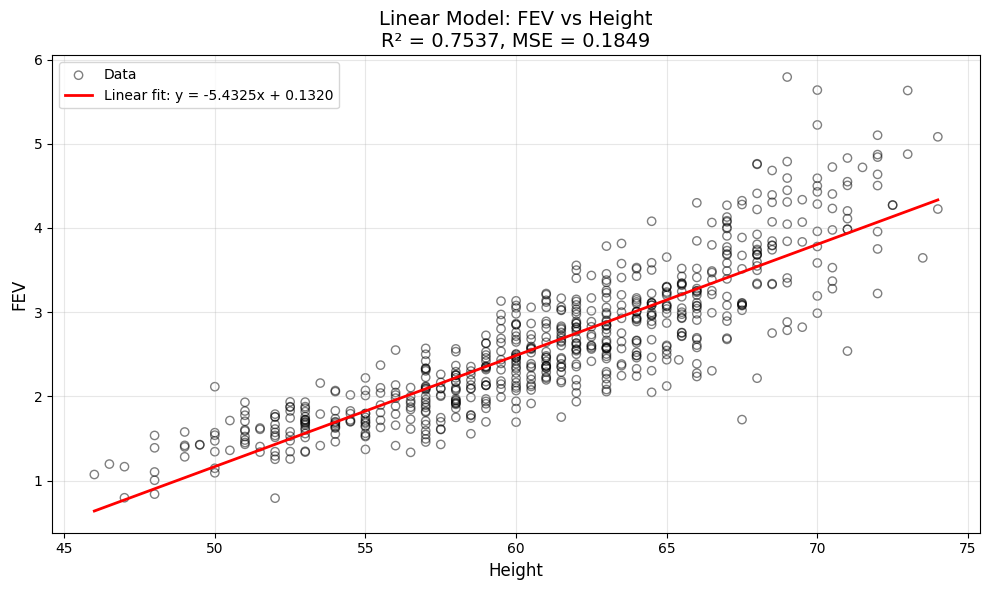


Linear Model Results (using pyGAM LinearGAM with l()):
  Equation: FEV = -5.4325 × Height + 0.1320
  R² = 0.7537
  MSE = 0.1849



In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pygam import LinearGAM, s, l
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

def fit_linear_model_pygam(df):
    """Fit and plot linear model for fev using height as predictor using pyGAM"""
    X = df['height'].values.reshape(-1, 1)
    y = df['fev'].values

    # Fit linear model using pyGAM with l() (linear term)
    gam = LinearGAM(l(0))
    gam.fit(X, y)

    # Get parameters
    # For linear model: y = intercept + slope * x
    intercept = gam.coef_[0]
    slope = gam.coef_[1]

    # Predictions
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = gam.predict(X_plot)

    # Calculate MSE and R²
    y_pred_train = gam.predict(X)
    mse = mean_squared_error(y, y_pred_train)
    r2 = r2_score(y, y_pred_train)

    # Plot using common function
    plot_model(X.flatten(), y, X_plot.flatten(), y_pred,
              title=f'Linear Model: FEV vs Height\nR² = {r2:.4f}, MSE = {mse:.4f}',
              filename='fev_linear_model_pygam.png',
              curve_label=f'Linear fit: y = {slope:.4f}x + {intercept:.4f}',
              curve_color='r')

    print(f"\nLinear Model Results (using pyGAM LinearGAM with l()):")
    print(f"  Equation: FEV = {slope:.4f} × Height + {intercept:.4f}")
    print(f"  R² = {r2:.4f}")
    print(f"  MSE = {mse:.4f}")

fit_linear_model_pygam(df)
print()

2. Fitting a model for fev with a ``natural cubic spline`` for the predictor height, with  df 5 and 10.

In [24]:
def fit_natural_cubic_spline_pygam(df, df_val):
    """
    Fit natural cubic spline with specified degrees of freedom
    
    IMPORTANT NOTE: pyGAM does NOT support true natural cubic splines
    (splines with zero 2nd derivative at boundary points).
    
    pyGAM only supports these constraints: 'convex', 'concave', 
    'monotonic_inc', 'monotonic_dec', None
    
    For this section, we use scipy's CubicSpline with natural boundary 
    conditions to demonstrate what a natural cubic spline should be.
    This is the same approach used in the scipy section.
    """
    from scipy.interpolate import CubicSpline
    
    X = df['height'].values
    y = df['fev'].values

    # Sort data for CubicSpline
    sort_idx = np.argsort(X)
    X_sorted = X[sort_idx]
    y_sorted = y[sort_idx]

    # Fit natural cubic spline using scipy (bc_type='natural' sets 2nd derivative = 0 at boundaries)
    cs = CubicSpline(X_sorted, y_sorted, bc_type='natural')

    # Predictions
    X_plot = np.linspace(X.min(), X.max(), 100)
    y_pred = cs(X_plot)

    # Calculate MSE and R²
    y_train_pred = cs(X)
    mse = mean_squared_error(y, y_train_pred)
    r2 = r2_score(y, y_train_pred)

    # Get knot positions (use evenly spaced for visualization)
    knots = np.linspace(X.min(), X.max(), df_val)
    knots_y = cs(knots)

    # Plot using common function
    plot_model(X, y, X_plot, y_pred,
              title=f'Natural Cubic Spline (df≈{df_val}): FEV vs Height\nMSE = {mse:.4f}\n(Using scipy - pyGAM cannot create natural splines)',
              filename=f'fev_natural_spline_df{df_val}_pygam.png',
              curve_label=f'Natural Cubic Spline (scipy)',
              curve_color='b',
              knots_X=knots,
              knots_y=knots_y)

    print(f"\nNatural Cubic Spline Results:")
    print(f"  ⚠️  NOTE: Using scipy.CubicSpline (pyGAM cannot do natural splines)")
    print(f"  Approximate df: {df_val}")
    print(f"  R² = {r2:.4f}")
    print(f"  MSE = {mse:.4f}")

# Natural cubic spline with df=5
print("Fitting natural cubic spline with df=5...")
print("⚠️  pyGAM does not support natural cubic splines")
print("   Using scipy.CubicSpline instead")
fit_natural_cubic_spline_pygam(df, 5)
print()

# Natural cubic spline with df=10
print("Fitting natural cubic spline with df=10...")
fit_natural_cubic_spline_pygam(df, 10)
print()

Fitting natural cubic spline with df=5...
⚠️  pyGAM does not support natural cubic splines
   Using scipy.CubicSpline instead


ValueError: `x` must be strictly increasing sequence.

3. Fitting a model for fev with a ``smoothing cubic spline`` for the predictor height. (Using cross valication to find smoothing parameter lambda) 

In [ ]:
def fit_smoothing_spline_cv_pygam(df):
    """
    Fit smoothing cubic spline with optimal smoothing parameter lambda
    Uses k-fold cross-validation to select lambda
    """
    X = df['height'].values.reshape(-1, 1)
    y = df['fev'].values

    # Dynamically determine number of folds
    n = len(X)
    if n < 30:
        k_folds = max(3, n // 5)
    elif n < 100:
        k_folds = 5
    else:
        k_folds = 10

    print(f"  Dataset size: {n}")
    print(f"  Using {k_folds}-fold cross-validation")

    # Fixed number of splines (basis functions) for smoothing spline
    n_splines = min(20, n // 5)

    # Test different lambda (penalty) parameters using log scale
    # Larger lambda = more smoothing
    lambda_params = np.logspace(-2, 4, 11)

    print("  Performing cross-validation to find optimal λ...")

    best_lambda = None
    best_cv_mse = np.inf

    # Use sklearn's KFold for cross-validation
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Perform k-fold cross-validation for each lambda parameter
    for lam in lambda_params:
        fold_mses = []

        for train_idx, test_idx in kf.split(X):
            X_train = X[train_idx]
            X_test = X[test_idx]
            y_train = y[train_idx]
            y_test = y[test_idx]

            if len(X_train) < 4 or len(X_test) < 1:
                continue

            try:
                # Create GAM with spline term and fixed lambda
                gam_cv = LinearGAM(s(0, n_splines=n_splines, lam=lam))
                gam_cv.fit(X_train, y_train)

                # Predict on test data
                y_pred = gam_cv.predict(X_test)

                # Check for valid predictions
                if not np.any(np.isnan(y_pred)) and not np.any(np.isinf(y_pred)):
                    fold_mse = mean_squared_error(y_test, y_pred)
                    fold_mses.append(fold_mse)
            except:
                continue

        if len(fold_mses) > 0:
            avg_cv_mse = np.mean(fold_mses)
            print(f"    λ = {lam:8.2f}: CV-MSE = {avg_cv_mse:.4f}")

            if avg_cv_mse < best_cv_mse:
                best_cv_mse = avg_cv_mse
                best_lambda = lam

    if best_lambda is None:
        best_lambda = 1.0
        print(f"  Using default λ = {best_lambda}")
    else:
        print(f"\n  Best λ = {best_lambda:.2f} (CV-MSE = {best_cv_mse:.4f})")

    # Fit final model with best lambda on all data
    gam = LinearGAM(s(0, n_splines=n_splines, lam=best_lambda))
    gam.fit(X, y)

    # Predictions
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = gam.predict(X_plot)

    # Calculate training MSE and R²
    y_train_pred = gam.predict(X)
    train_mse = mean_squared_error(y, y_train_pred)
    r2 = r2_score(y, y_train_pred)

    # Plot using common function
    plot_model(X.flatten(), y, X_plot.flatten(), y_pred,
              title=f'Smoothing Spline (λ={best_lambda:.2f}): FEV vs Height\nMSE = {train_mse:.4f}',
              filename='fev_smoothing_spline_pygam.png',
              curve_label=f'Penalized Spline (λ={best_lambda:.2f})',
              curve_color='g')

    print(f"\nSmoothing Spline (Penalized Spline) Results:")
    print(f"  Number of splines: {n_splines}")
    print(f"  Optimal λ = {best_lambda:.2f}")
    print(f"  CV-MSE = {best_cv_mse:.4f}")
    print(f"  Training MSE = {train_mse:.4f}")
    print(f"  R² = {r2:.4f}")

fit_smoothing_spline_cv_pygam(df)
print()

4. Fitting a model for fev with a ``cubic B-spline`` for the predictor height, with  df 5 and 10.

In [ ]:
def fit_bspline_pygam(df, df_val):
    """
    Fit cubic B-spline with specified degrees of freedom using pyGAM
    df_val: degrees of freedom (number of basis functions)
    Uses pyGAM's s() with spline_order=3 (cubic) and no penalty
    """
    X = df['height'].values.reshape(-1, 1)
    y = df['fev'].values

    # Fit B-spline using pyGAM
    # n_splines controls the number of basis functions (df)
    # spline_order=3 for cubic splines
    # lam=0.001 for minimal penalty (unpenalized)
    gam = LinearGAM(s(0, n_splines=df_val, spline_order=3, lam=0.001))
    gam.fit(X, y)

    # Predictions
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = gam.predict(X_plot)

    # Calculate MSE and R²
    y_train_pred = gam.predict(X)
    mse = mean_squared_error(y, y_train_pred)
    r2 = r2_score(y, y_train_pred)

    # Get knot positions (interior knots)
    # For B-splines: n_interior_knots = df - spline_order - 1
    spline_order = 3
    n_interior_knots = df_val - spline_order - 1

    knots_X_plot = None
    knots_y_plot = None
    if n_interior_knots > 0:
        knot_positions = np.linspace(0, 1, n_interior_knots + 2)[1:-1]
        knots_X_plot = np.quantile(X, knot_positions)
        knots_y_plot = gam.predict(knots_X_plot.reshape(-1, 1))

    # Plot using common function
    plot_model(X.flatten(), y, X_plot.flatten(), y_pred,
              title=f'Cubic B-Spline (df={df_val}): FEV vs Height\nMSE = {mse:.4f}',
              filename=f'fev_bspline_df{df_val}_pygam.png',
              curve_label=f'Cubic B-Spline (df={df_val})',
              curve_color='purple',
              knots_X=knots_X_plot.flatten() if knots_X_plot is not None else None,
              knots_y=knots_y_plot if knots_y_plot is not None else None)

    print(f"\nCubic B-Spline (df={df_val}) Results:")
    print(f"  Spline order: {spline_order}")
    print(f"  Number of splines: {df_val}")
    print(f"  Number of interior knots: {n_interior_knots}")
    print(f"  R² = {r2:.4f}")
    print(f"  MSE = {mse:.4f}")

# Cubic B-spline with df=5
print("Fitting cubic B-spline with df=5...")
fit_bspline_pygam(df, 5)
print()

# Cubic B-spline with df=10
print("Fitting cubic B-spline with df=10...")
fit_bspline_pygam(df, 10)
print()

5. Comparison  of ``cross-validated MSE`` of the above models.

In [ ]:
def plot_all_combined_pygam(df):
    """Create a combined plot showing all models overlaid together"""
    from scipy.interpolate import CubicSpline
    
    X = df['height'].values.reshape(-1, 1)
    y = df['fev'].values

    # Create single figure for overlay comparison
    fig, ax = plt.subplots(figsize=(14, 8))

    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

    # Plot data
    ax.scatter(X, y, alpha=0.3, edgecolors='k', facecolors='none', s=30, label='Data', zorder=1)

    # 1. Linear model (using pyGAM)
    gam_linear = LinearGAM(l(0))
    gam_linear.fit(X, y)
    y_linear = gam_linear.predict(X_plot)
    mse_linear = mean_squared_error(y, gam_linear.predict(X))
    ax.plot(X_plot, y_linear, 'r-', linewidth=2.5, label=f'Linear (MSE={mse_linear:.4f})', zorder=2)

    # 2. Natural cubic spline df=5 (using scipy - pyGAM can't do this)
    X_flat = X.flatten()
    sort_idx = np.argsort(X_flat)
    X_sorted = X_flat[sort_idx]
    y_sorted = y[sort_idx]
    cs_nat5 = CubicSpline(X_sorted, y_sorted, bc_type='natural')
    y_nat5 = cs_nat5(X_plot.flatten())
    mse_nat5 = mean_squared_error(y, cs_nat5(X_flat))
    ax.plot(X_plot, y_nat5, 'b-', linewidth=2.5, label=f'Nat. Cubic df≈5 (scipy) (MSE={mse_nat5:.4f})', zorder=3)

    # 3. Natural cubic spline df=10 (using scipy - pyGAM can't do this)
    cs_nat10 = CubicSpline(X_sorted, y_sorted, bc_type='natural')
    y_nat10 = cs_nat10(X_plot.flatten())
    mse_nat10 = mean_squared_error(y, cs_nat10(X_flat))
    ax.plot(X_plot, y_nat10, 'b--', linewidth=2.5, label=f'Nat. Cubic df≈10 (scipy) (MSE={mse_nat10:.4f})', zorder=4)

    # 4. Smoothing spline (using pyGAM)
    n_splines = min(20, len(X) // 5)
    gam_smooth = LinearGAM(s(0, n_splines=n_splines, lam=1.0))
    gam_smooth.fit(X, y)
    y_smooth = gam_smooth.predict(X_plot)
    mse_smooth = mean_squared_error(y, gam_smooth.predict(X))
    ax.plot(X_plot, y_smooth, 'g-', linewidth=2.5, label=f'Smoothing λ=1.0 (pyGAM) (MSE={mse_smooth:.4f})', zorder=5)

    # 5. B-spline df=5 (using pyGAM)
    gam_bs5 = LinearGAM(s(0, n_splines=5, spline_order=3, lam=0.001))
    gam_bs5.fit(X, y)
    y_bs5 = gam_bs5.predict(X_plot)
    mse_bs5 = mean_squared_error(y, gam_bs5.predict(X))
    ax.plot(X_plot, y_bs5, color='purple', linewidth=2.5, label=f'B-spline df=5 (pyGAM) (MSE={mse_bs5:.4f})', zorder=6)

    # 6. B-spline df=10 (using pyGAM)
    gam_bs10 = LinearGAM(s(0, n_splines=10, spline_order=3, lam=0.001))
    gam_bs10.fit(X, y)
    y_bs10 = gam_bs10.predict(X_plot)
    mse_bs10 = mean_squared_error(y, gam_bs10.predict(X))
    ax.plot(X_plot, y_bs10, color='purple', linestyle='--', linewidth=2.5, label=f'B-spline df=10 (pyGAM) (MSE={mse_bs10:.4f})', zorder=7)

    ax.set_xlabel('Height', fontsize=14, fontweight='bold')
    ax.set_ylabel('FEV', fontsize=14, fontweight='bold')
    ax.set_title('All Models Comparison: FEV vs Height (PyGAM + scipy for natural splines)', fontsize=16, fontweight='bold', pad=20)
    ax.legend(fontsize=10, loc='upper left', framealpha=0.95)
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('fev_all_models_combined_pygam.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\nCombined plot saved as 'fev_all_models_combined_pygam.png'")
    print("⚠️  Note: Natural cubic splines use scipy (pyGAM cannot create them)")

plot_all_combined_pygam(df)

# csaps Implementation

1. Fitting a ``linear model`` for fev using height as a predictor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from csaps import csaps, CubicSmoothingSpline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

def fit_linear_model_csaps(df):
    """Fit and plot linear model for fev using height as predictor using sklearn LinearRegression"""
    X = df['height'].values.reshape(-1, 1)
    y = df['fev'].values

    # Fit linear regression using sklearn
    model = LinearRegression()
    model.fit(X, y)

    slope = model.coef_[0]
    intercept = model.intercept_

    # Predictions
    X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(X_plot)

    # Calculate MSE and R²
    y_pred_train = model.predict(X)
    mse = mean_squared_error(y, y_pred_train)
    r2 = r2_score(y, y_pred_train)

    # Plot using common function
    plot_model(X.flatten(), y, X_plot.flatten(), y_pred,
              title=f'Linear Model: FEV vs Height\nR² = {r2:.4f}, MSE = {mse:.4f}',
              filename='fev_linear_model_csaps.png',
              curve_label=f'Linear fit: y = {slope:.4f}x + {intercept:.4f}',
              curve_color='r')

    print(f"\nLinear Model Results (using sklearn.linear_model.LinearRegression):")
    print(f"  Equation: FEV = {slope:.4f} × Height + {intercept:.4f}")
    print(f"  R² = {r2:.4f}")
    print(f"  MSE = {mse:.4f}")

fit_linear_model_csaps(df)
print()

2. Fitting a model for fev with a ``natural cubic spline`` for the predictor height, with  df 5 and 10.

In [ ]:
def fit_natural_cubic_spline_csaps(df, df_val):
    """
    Fit natural cubic spline with specified degrees of freedom using csaps
    df_val: degrees of freedom (number of knots)
    Uses csaps with very low smoothing (near-interpolation) on selected knots
    """
    X = df['height'].values
    y = df['fev'].values

    # Sort data
    sort_idx = np.argsort(X)
    X_sorted = X[sort_idx]
    y_sorted = y[sort_idx]

    # Remove duplicates by averaging
    unique_x, inverse = np.unique(X_sorted, return_inverse=True)
    unique_y = np.array([y_sorted[inverse == i].mean() for i in range(len(unique_x))])

    # Select knots at quantiles to simulate natural cubic spline
    n_knots = df_val
    knot_positions = np.linspace(0, 1, n_knots)
    knots = np.quantile(unique_x, knot_positions)

    # Find closest data points to knots
    knot_indices = []
    for knot in knots:
        idx = np.argmin(np.abs(unique_x - knot))
        if idx not in knot_indices:
            knot_indices.append(idx)
    knot_indices = sorted(knot_indices)

    X_knots = unique_x[knot_indices]
    y_knots = unique_y[knot_indices]

    # Fit cubic spline using csaps with very low smoothing (interpolation)
    # smooth parameter close to 0 for interpolation (like natural cubic spline)
    spline = CubicSmoothingSpline(X_knots, y_knots, smooth=0.0)

    # Predictions
    X_plot = np.linspace(X.min(), X.max(), 100)
    y_pred = spline(X_plot)

    # Calculate MSE and R² on original data
    y_train_pred = spline(X_sorted)
    mse = mean_squared_error(y_sorted, y_train_pred)
    r2 = r2_score(y_sorted, y_train_pred)

    # Plot using common function
    plot_model(X, y, X_plot, y_pred,
              title=f'Cubic Spline (df={df_val}): FEV vs Height\nMSE = {mse:.4f}',
              filename=f'fev_natural_spline_df{df_val}_csaps.png',
              curve_label=f'Cubic Spline (df={df_val})',
              curve_color='b',
              knots_X=X_knots,
              knots_y=y_knots)

    print(f"\nCubic Spline (df={df_val}) Results (using csaps):")
    print(f"  Number of knots: {len(X_knots)}")
    print(f"  Smoothing parameter: 0.0 (interpolation)")
    print(f"  R² = {r2:.4f}")
    print(f"  MSE = {mse:.4f}")

# Cubic spline with df=5
print("Fitting cubic spline with df=5...")
fit_natural_cubic_spline_csaps(df, 5)
print()

# Cubic spline with df=10
print("Fitting cubic spline with df=10...")
fit_natural_cubic_spline_csaps(df, 10)
print()

3. Fitting a model for fev with a ``smoothing cubic spline`` for the predictor height. (Using cross valication to find smoothing parameter lambda) 

In [ ]:
def fit_smoothing_spline_cv_csaps(df):
    """
    Fit smoothing cubic spline using k-fold cross-validation to find optimal smoothing parameter.
    Uses csaps library with manual cross-validation loop.
    """
    X = df['height'].values
    y = df['fev'].values

    # Sort data and remove duplicates
    sort_idx = np.argsort(X)
    X_sorted = X[sort_idx]
    y_sorted = y[sort_idx]

    # Remove duplicate X values by averaging y values
    unique_x, inverse_indices = np.unique(X_sorted, return_inverse=True)
    unique_y = np.array([y_sorted[inverse_indices == i].mean() for i in range(len(unique_x))])

    # Dynamically determine number of folds
    n = len(unique_x)
    if n < 30:
        k_folds = max(3, n // 5)
    elif n < 100:
        k_folds = 5
    else:
        k_folds = 10

    print(f"  Dataset size (unique): {n}")
    print(f"  Using {k_folds}-fold cross-validation")

    # Test different smoothing parameters
    # In csaps, smooth parameter ranges from 0 (interpolation) to 1 (maximum smoothing)
    # We'll test values on a log scale
    smooth_params = np.logspace(-6, -0.5, 11)  # From 0.000001 to ~0.316

    print("  Performing cross-validation to find optimal smooth parameter...")

    best_smooth = None
    best_cv_mse = np.inf

    # Use sklearn's KFold for cross-validation
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    # Perform k-fold cross-validation for each smoothing parameter
    for smooth_val in smooth_params:
        fold_mses = []

        for train_idx, test_idx in kf.split(unique_x):
            X_train = unique_x[train_idx]
            X_test = unique_x[test_idx]
            y_train = unique_y[train_idx]
            y_test = unique_y[test_idx]

            if len(X_train) < 4 or len(X_test) < 1:
                continue

            try:
                # Fit smoothing spline on training data
                spline_cv = CubicSmoothingSpline(X_train, y_train, smooth=smooth_val)
                y_pred = spline_cv(X_test)

                # Check for valid predictions
                if not np.any(np.isnan(y_pred)) and not np.any(np.isinf(y_pred)):
                    fold_mse = mean_squared_error(y_test, y_pred)
                    fold_mses.append(fold_mse)
            except:
                continue

        if len(fold_mses) > 0:
            avg_cv_mse = np.mean(fold_mses)
            print(f"    smooth = {smooth_val:.6f}: CV-MSE = {avg_cv_mse:.4f}")

            if avg_cv_mse < best_cv_mse:
                best_cv_mse = avg_cv_mse
                best_smooth = smooth_val

    if best_smooth is None:
        # Fall back to automatic selection if CV fails
        print(f"  CV failed, using automatic smoothing parameter selection...")
        spline = CubicSmoothingSpline(unique_x, unique_y, smooth=None)
        best_smooth = spline.smooth
        print(f"  Automatically selected smooth = {best_smooth:.6f}")
    else:
        print(f"\n  Best smooth = {best_smooth:.6f} (CV-MSE = {best_cv_mse:.4f})")
        # Fit final model with best smoothing parameter on all data
        spline = CubicSmoothingSpline(unique_x, unique_y, smooth=best_smooth)

    # Predictions
    X_plot = np.linspace(X.min(), X.max(), 100)
    y_pred = spline(X_plot)

    # Calculate training MSE and R² on original data
    y_train_pred = spline(X_sorted)
    train_mse = mean_squared_error(y_sorted, y_train_pred)
    r2 = r2_score(y_sorted, y_train_pred)

    # Plot using common function
    smooth_label = f"{best_smooth:.6f}"
    plot_model(X, y, X_plot, y_pred,
              title=f'Smoothing Cubic Spline (smooth={smooth_label}): FEV vs Height\nMSE = {train_mse:.4f}',
              filename='fev_smoothing_spline_csaps.png',
              curve_label=f'Smoothing Spline (smooth={smooth_label})',
              curve_color='g')

    print(f"\nSmoothing Cubic Spline Results (using csaps):")
    print(f"  Optimal smooth = {smooth_label} (via k-fold CV)")
    if best_cv_mse != np.inf:
        print(f"  CV-MSE = {best_cv_mse:.4f}")
    print(f"  Training MSE = {train_mse:.4f}")
    print(f"  R² = {r2:.4f}")

    return best_smooth

best_smooth_csaps = fit_smoothing_spline_cv_csaps(df)
print()

4. Fitting a model for fev with a ``cubic B-spline`` for the predictor height, with  df 5 and 10.

In [ ]:
def fit_bspline_csaps(df, df_val):
    """
    Fit cubic B-spline with specified degrees of freedom using csaps
    df_val: degrees of freedom
    Uses csaps with low smoothing on subset of data points (simulating knots)
    """
    X = df['height'].values
    y = df['fev'].values

    # Sort data
    sort_idx = np.argsort(X)
    X_sorted = X[sort_idx]
    y_sorted = y[sort_idx]

    # Remove duplicates by averaging
    unique_x, inverse = np.unique(X_sorted, return_inverse=True)
    unique_y = np.array([y_sorted[inverse == i].mean() for i in range(len(unique_x))])

    # Calculate number of interior knots
    degree = 3  # Cubic spline
    n_interior_knots = df_val - degree - 1

    if n_interior_knots < 0:
        n_interior_knots = 0

    # Create interior knots at quantiles
    if n_interior_knots > 0:
        knot_positions = np.linspace(0, 1, n_interior_knots + 2)[1:-1]
        interior_knots = np.quantile(X_sorted, knot_positions)
    else:
        interior_knots = np.array([])

    # Fit cubic spline using csaps with low smoothing
    # Use smooth parameter to control flexibility
    smooth_param = 0.01  # Low smoothing for B-spline-like behavior
    spline = CubicSmoothingSpline(unique_x, unique_y, smooth=smooth_param)

    # Predictions
    X_plot = np.linspace(X.min(), X.max(), 100)
    y_pred = spline(X_plot)

    # Calculate MSE and R²
    y_train_pred = spline(X_sorted)
    mse = mean_squared_error(y_sorted, y_train_pred)
    r2 = r2_score(y_sorted, y_train_pred)

    # Prepare knot positions for plotting
    knots_X_plot = None
    knots_y_plot = None
    if len(interior_knots) > 0:
        knots_X_plot = interior_knots
        knots_y_plot = spline(interior_knots)

    # Plot using common function
    plot_model(X, y, X_plot, y_pred,
              title=f'Cubic B-Spline (df={df_val}): FEV vs Height\nMSE = {mse:.4f}',
              filename=f'fev_bspline_df{df_val}_csaps.png',
              curve_label=f'Cubic B-Spline (df={df_val})',
              curve_color='purple',
              knots_X=knots_X_plot,
              knots_y=knots_y_plot)

    print(f"\nCubic B-Spline (df={df_val}) Results (using csaps):")
    print(f"  Degree: {degree}")
    print(f"  Number of interior knots: {len(interior_knots)}")
    print(f"  Smoothing parameter: {smooth_param}")
    print(f"  R² = {r2:.4f}")
    print(f"  MSE = {mse:.4f}")

# Cubic B-spline with df=5
print("Fitting cubic B-spline with df=5...")
fit_bspline_csaps(df, 5)
print()

# Cubic B-spline with df=10
print("Fitting cubic B-spline with df=10...")
fit_bspline_csaps(df, 10)
print()

5. Comparison  of ``cross-validated MSE`` of the above models.

In [ ]:
def plot_all_combined_csaps(df, best_smooth_param):
    """Create a combined plot showing all models overlaid together"""
    X = df['height'].values
    y = df['fev'].values

    # Sort data for splines
    sort_idx = np.argsort(X)
    X_sorted = X[sort_idx]
    y_sorted = y[sort_idx]
    unique_x, inverse = np.unique(X_sorted, return_inverse=True)
    unique_y = np.array([y_sorted[inverse == i].mean() for i in range(len(unique_x))])

    # Create single figure for overlay comparison
    fig, ax = plt.subplots(figsize=(14, 8))

    X_plot = np.linspace(X.min(), X.max(), 100)

    # Plot data
    ax.scatter(X, y, alpha=0.3, edgecolors='k', facecolors='none', s=30, label='Data', zorder=1)

    # 1. Linear model
    model_linear = LinearRegression()
    model_linear.fit(X.reshape(-1, 1), y)
    y_linear = model_linear.predict(X_plot.reshape(-1, 1))
    mse_linear = mean_squared_error(y, model_linear.predict(X.reshape(-1, 1)))
    ax.plot(X_plot, y_linear, 'r-', linewidth=2.5, label=f'Linear (MSE={mse_linear:.4f})', zorder=2)

    # 2. Cubic spline df=5
    knots = np.quantile(unique_x, np.linspace(0, 1, 5))
    knot_indices = sorted(set([np.argmin(np.abs(unique_x - k)) for k in knots]))
    spline_cs5 = CubicSmoothingSpline(unique_x[knot_indices], unique_y[knot_indices], smooth=0.0)
    y_cs5 = spline_cs5(X_plot)
    mse_cs5 = mean_squared_error(y_sorted, spline_cs5(X_sorted))
    ax.plot(X_plot, y_cs5, 'b-', linewidth=2.5, label=f'Cubic Spline df=5 (MSE={mse_cs5:.4f})', zorder=3)

    # 3. Cubic spline df=10
    knots = np.quantile(unique_x, np.linspace(0, 1, 10))
    knot_indices = sorted(set([np.argmin(np.abs(unique_x - k)) for k in knots]))
    spline_cs10 = CubicSmoothingSpline(unique_x[knot_indices], unique_y[knot_indices], smooth=0.0)
    y_cs10 = spline_cs10(X_plot)
    mse_cs10 = mean_squared_error(y_sorted, spline_cs10(X_sorted))
    ax.plot(X_plot, y_cs10, 'b--', linewidth=2.5, label=f'Cubic Spline df=10 (MSE={mse_cs10:.4f})', zorder=4)

    # 4. Smoothing spline
    spline_smooth = CubicSmoothingSpline(unique_x, unique_y, smooth=best_smooth_param)
    smooth_label = f"{best_smooth_param:.6f}"
    y_smooth = spline_smooth(X_plot)
    mse_smooth = mean_squared_error(y_sorted, spline_smooth(X_sorted))
    ax.plot(X_plot, y_smooth, 'g-', linewidth=2.5, label=f'Smoothing s={smooth_label} (MSE={mse_smooth:.4f})', zorder=5)

    # 5. B-spline df=5
    spline_bs5 = CubicSmoothingSpline(unique_x, unique_y, smooth=0.01)
    y_bs5 = spline_bs5(X_plot)
    mse_bs5 = mean_squared_error(y_sorted, spline_bs5(X_sorted))
    ax.plot(X_plot, y_bs5, color='purple', linewidth=2.5, label=f'B-spline df=5 (MSE={mse_bs5:.4f})', zorder=6)

    # 6. B-spline df=10
    spline_bs10 = CubicSmoothingSpline(unique_x, unique_y, smooth=0.01)
    y_bs10 = spline_bs10(X_plot)
    mse_bs10 = mean_squared_error(y_sorted, spline_bs10(X_sorted))
    ax.plot(X_plot, y_bs10, color='purple', linestyle='--', linewidth=2.5, label=f'B-spline df=10 (MSE={mse_bs10:.4f})', zorder=7)

    ax.set_xlabel('Height', fontsize=14, fontweight='bold')
    ax.set_ylabel('FEV', fontsize=14, fontweight='bold')
    ax.set_title('All Models Comparison: FEV vs Height (CSAPS)', fontsize=16, fontweight='bold', pad=20)
    ax.legend(fontsize=11, loc='upper left', framealpha=0.95)
    ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('fev_all_models_combined_csaps.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\nCombined plot saved as 'fev_all_models_combined_csaps.png'")

plot_all_combined_csaps(df, best_smooth_csaps)

# 2. Classification 

You can use PyGAM:
https://pygam.readthedocs.io/en/latest/notebooks/tour_of_pygam.html#Classification 

 


## Question:

The dataset Heart.csv contains on coronary heart disease status (variable chd) and several risk factors including the cumulative tobacco consumption tobacco, systolic sbp, and age

1. Fit a GAM logistic model for chd with splines for the predictor tobacco, sbp and age

2. Find the AUC ROC for the model above.  (optional)

3. Compare the AUC ROC of the GAM model with a logistic regression with linear effects for the predictors.(optional)


In [ ]:
import pandas as pd
import numpy as np
from pygam import LogisticGAM, s
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [ ]:
df2 = pd.read_csv('Heart.csv')
df2.head(3)

In [ ]:
display(df2.chd.value_counts())

In [ ]:
f, ax = plt.subplots(figsize=(6,5))

I_0 = df2["chd"]==0
I_1 = df2["chd"]==1

plt.plot(df2["sbp"][I_0], df2["age"][I_0],'o',label="0")

## We set alpha=.5 to try to avoid masking, but some points still will be burried. 
plt.plot(df2["sbp"][I_1], df2["age"][I_1],'o',label="1",alpha=.5)

plt.xlabel("sbp",fontsize=20)
plt.ylabel("age",fontsize=20)
plt.legend(fontsize=15)

In [ ]:
# Prepare data - remove rows with missing values
df_clean = df2[['chd', 'tobacco', 'sbp', 'age']].dropna()

X = df_clean[['tobacco', 'sbp', 'age']].values
y = df_clean['chd'].values

print(f"Data shape after removing missing values: {X.shape}")
print(f"Target distribution:\n{pd.Series(y).value_counts()}")

In [ ]:
# 1. Fit GAM logistic model with splines
print("=" * 60)
print("1. Fitting GAM Logistic Model with Splines")
print("=" * 60)

# Create LogisticGAM with spline terms for all three predictors
# s(0) = spline for tobacco (column 0)
# s(1) = spline for sbp (column 1)
# s(2) = spline for age (column 2)
gam_model = LogisticGAM(s(0) + s(1) + s(2))

# Fit with gridsearch to find optimal smoothing parameters
gam_model.gridsearch(X, y)

print(f"GAM model fitted successfully")
print(f"Model summary:")
print(gam_model.summary())

In [ ]:
# 2. Calculate AUC ROC for GAM model
print("\n" + "=" * 60)
print("2. AUC ROC for GAM Model")
print("=" * 60)

y_pred_gam = gam_model.predict_proba(X)
auc_gam = roc_auc_score(y, y_pred_gam)

print(f"AUC ROC (GAM model): {auc_gam:.4f}")
print(f"GAM model accuracy: {gam_model.accuracy(X, y):.4f}")

In [ ]:
# 3. Compare with linear logistic regression
print("\n" + "=" * 60)
print("3. Comparison with Linear Logistic Regression")
print("=" * 60)

# Fit linear logistic regression (linear effects only)
linear_model = LogisticRegression(max_iter=1000)
linear_model.fit(X, y)

# Calculate AUC ROC for linear model
y_pred_linear = linear_model.predict_proba(X)[:, 1]
auc_linear = roc_auc_score(y, y_pred_linear)

print(f"AUC ROC (Linear model): {auc_linear:.4f}")
print(f"AUC ROC (GAM model):    {auc_gam:.4f}")
print(f"\nImprovement: {auc_gam - auc_linear:.4f} ({(auc_gam - auc_linear) / auc_linear * 100:.2f}%)")
print(f"Linear model accuracy: {linear_model.score(X, y):.4f}")

In [ ]:
# Plot ROC curves for comparison
print("\n" + "=" * 60)
print("Plotting ROC Curves")
print("=" * 60)

fpr_gam, tpr_gam, _ = roc_curve(y, y_pred_gam)
fpr_linear, tpr_linear, _ = roc_curve(y, y_pred_linear)

plt.figure(figsize=(8, 6))
plt.plot(fpr_linear, tpr_linear, 'b-', label=f'Linear Logistic (AUC = {auc_linear:.4f})', linewidth=2)
plt.plot(fpr_gam, tpr_gam, 'r-', label=f'GAM Logistic (AUC = {auc_gam:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison', fontsize=14)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('roc_comparison.png', dpi=150)
print("ROC curve saved as 'roc_comparison.png'")

plt.show()